In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tqdm.notebook import tqdm

In [3]:
import pandas as pd

In [4]:
import os, sys, re

In [5]:
regex = re.compile(r'\d+')

In [6]:
data_folder = os.path.join('/','Users', 'cdesio', 'UoB', 'leakage')

In [7]:
T0 = os.path.join(data_folder,'T0.1')
fname = os.path.join(T0, 'AVG_Tint1753440.tif')
im = plt.imread(fname)

200 120 1 3705
200 1120 2 3618
200 2270 3 4267
1200 120 4 3809
1200 1120 5 3598
1200 2270 6 3467
1950 120 7 3284
1950 1120 8 3036
1950 2270 9 2863


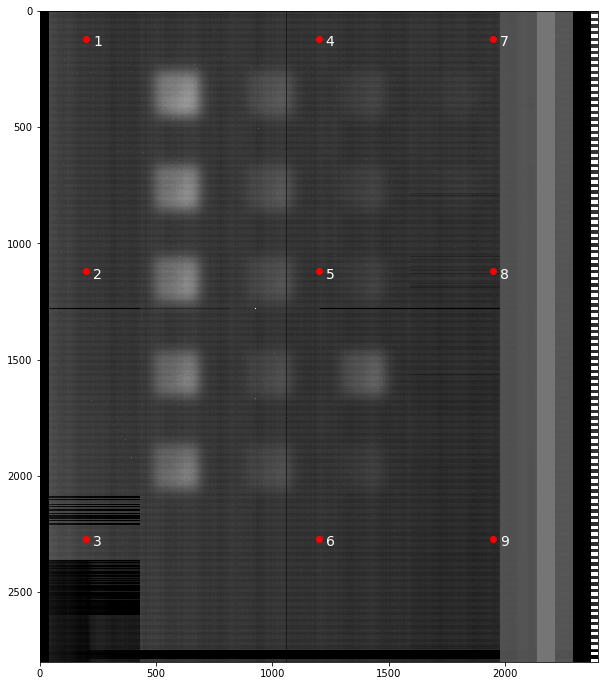

In [8]:
a0=200
a1=1000
a_shift = 750

a = [a0+ alpha*a1 + beta * a_shift for alpha,beta in zip([0,1,1], [0,0,1])]

b0=120
b1=1000
b_shift = 1150
b = [b0+alpha*b1+beta*b_shift for alpha,beta in zip([0,1,1], [0,0,1])]

rad_dam = [1, 2, 3, 4, 5, 6, 7, 8,9]

iter_rad_dam = iter(rad_dam)

plt.figure(figsize=(10,15))
plt.imshow(im, cmap='gray')
#plt.xlim(0,2400)
#plt.ylim(0, 2800)
iter_rad_dam = iter(rad_dam)
for xa in a:
    for xb in b:
        label=next(iter_rad_dam)

        plt.scatter(xa, xb, c='red')
        plt.text(xa+30, xb+30,label , color='w', size=14)
        print(xa, xb, label, im[xb, xa])

plt.savefig('nodamage_sensor_map.png')

In [9]:
extracted_folder = os.path.join(data_folder, 'extracted_nodamage')

In [10]:
fnames = os.listdir(extracted_folder)

In [11]:
Temps = []
Tints = []

In [12]:
for fname in fnames:
    split = fname.split('_')
    T = split[0]
    tint = split[1]
    Temps.append(float(T[1:]))
    Tints.append(int(regex.findall(tint)[0]))

In [13]:
np.unique(Temps)

array([-20. , -15. , -10. ,  -5. ,   0.1,   4.9,  10. ,  14.9,  20. ,
        24.8,  30. ])

In [14]:
np.unique(Tints)

array([ 1753440,  2454816,  3156192,  3857568,  4558944,  5260320,
        6663072,  6663702,  7364448,  8767200,  9468576, 10169952,
       10871328, 11572704, 13676832, 15780960, 21391968, 26301600,
       31912608, 33315360, 35068800, 52603224])

In [15]:
def sel_files(flist, ts=None):
    selected = []
    if len(ts)>0:
        for t in ts:
            for f in flist:
                if str(t) in f:
                    selected.append(f)
    return sorted(selected)
              

In [16]:
file_list = set(sel_files(fnames, ts = np.unique(Tints)))-set([])

In [14]:
pixels=[]

In [15]:
rad_dam = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for f in file_list:
    print(f)
    te = np.float(f.split('_')[0][1:])
    tint = int(regex.findall(f.split('_')[1])[0])
    imported = np.load(os.path.join(extracted_folder,f), allow_pickle=True)['pixels']
    
    for i, f in enumerate(imported):
        iter_rad_dam = iter(rad_dam)
        for r in f:
            label=next(iter_rad_dam)
            #print(i, label, np.mean(r))
            pixels.append([i, label, np.mean(r), te, tint])

T24.8_Tint2454816_sh10nodamage.npz
T-20.0_Tint15780960_sh10nodamage.npz
T30.0_Tint3857568_sh10nodamage.npz
T0.1_Tint10871328_sh10nodamage.npz
T30.0_Tint7364448_sh10nodamage.npz
T24.8_Tint11572704_sh10nodamage.npz
T0.1_Tint8767200_sh10nodamage.npz
T-10.0_Tint31912608_sh10nodamage.npz
T-20.0_Tint8767200_sh10nodamage.npz
T0.1_Tint21391968_sh10nodamage.npz
T0.1_Tint5260320_sh10nodamage.npz
T20.0_Tint10871328_sh10nodamage.npz
T20.0_Tint3857568_sh10nodamage.npz
T0.1_Tint2454816_sh10nodamage.npz
T4.9_Tint2454816_sh10nodamage.npz
T4.9_Tint7364448_sh10nodamage.npz
T-20.0_Tint13676832_sh10nodamage.npz
T14.9_Tint1753440_sh10nodamage.npz
T-5.0_Tint1753440_sh10nodamage.npz
T20.0_Tint1753440_sh10nodamage.npz
T24.8_Tint7364448_sh10nodamage.npz
T-5.0_Tint15780960_sh10nodamage.npz
T14.9_Tint10871328_sh10nodamage.npz
T-20.0_Tint3857568_sh10nodamage.npz
T-15.0_Tint31912608_sh10nodamage.npz
T0.1_Tint15780960_sh10nodamage.npz
T10.0_Tint9468576_sh10nodamage.npz
T14.9_Tint8767200_sh10nodamage.npz
T30.0_Tint1

In [16]:
df = pd.DataFrame(pixels, columns=['f_nb','region','intensity', 'T', 'tint'])

In [17]:
df

,f_nb,region,intensity,T,tint
0,0,1,3808.8800,24.8,2454816
1,0,2,4048.9800,24.8,2454816
2,0,3,4481.3325,24.8,2454816
3,0,4,3938.3400,24.8,2454816
4,0,5,4366.0325,24.8,2454816
...,...,...,...,...,...
232195,199,5,3120.1600,-10.0,10169952
232196,199,6,3162.6575,-10.0,10169952
232197,199,7,2888.4125,-10.0,10169952
232198,199,8,2729.3350,-10.0,10169952


In [21]:
averaged = df.groupby(['T', 'tint', 'region']).mean().reset_index()

In [24]:
averaged = averaged[['T','tint','region', 'intensity']]

---

### new algorithm

In [21]:
def bad_pixel_mask(array):
    mean = np.mean(array)
    if np.any(array)<= mean-2000:
        bad = np.where(array<=mean-2000)[0]
        for pix in bad:
            if pix<len(array)-1:
                array[pix] = np.mean([array[pix-1], array[pix+1]])
            else:
                array[pix]=array[pix-1]
    if np.any(array)>= mean+2000:
        bad_up = np.where(array>=mean+2000)[0]
        for px in bad_up:
            if px<len(array)-1:
                array[px] = np.mean([array[px-1], array[px+1]])
            else:
                array[px] = array[px-1]
    return array


In [28]:
rad_dam = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
n_regions = len(rad_dam)
n_files = len(file_list)
rad_dam = np.tile(rad_dam, n_files).reshape(n_files, n_regions)

def ravel_nested(ax):
    return np.vstack(ax).reshape(n_regions, 400)

mean_pix_by_pix = np.empty((n_files,n_regions))
std_pix_by_pix = np.empty((n_files,n_regions))
temps = np.zeros((n_files,n_regions))
tints = np.zeros((n_files,n_regions))
for i,f in tqdm(enumerate(file_list), desc='file'):
    temps[i] = np.tile(np.float(f.split('_')[0][1:]),n_regions)
    tints[i] = np.tile(int(regex.findall(f.split('_')[1])[0]),n_regions)
    imported = np.load(os.path.join(extracted_folder,f), allow_pickle=True)['pixels']
    stacked = np.apply_along_axis(ravel_nested, 1, imported)
    corrected = np.apply_along_axis(bad_pixel_mask, 0, stacked)
    mean_pix_by_pix[i]= np.mean(np.mean(corrected, axis=0), axis=1)
    std_pix_by_pix[i]= np.mean(np.std(corrected, axis=0), axis=1)


df = pd.DataFrame({"T":temps.ravel(), "tint":tints.ravel(), 'region':rad_dam.ravel(), 
                   'pedestal': mean_pix_by_pix.ravel(), 'noise':std_pix_by_pix.ravel()})

In [29]:
def select_fit(test_y):
    for i, y in enumerate(test_y):
        if y>=15000:
            break
    return i

In [32]:
def get_variables(df, skip=None):   
    slopes = []
    slope_errs = []
    inter_errs = []
    temperatures = []
    radiations = []
    intercepts = []
    for (T, r), group in df.groupby(['T', 'region']):

        xx = np.sort(np.array(group['tint']))
        yy = np.sort(np.array(group['pedestal']))
        cut = select_fit(yy)

        slope=None
        intercept=None
        if T>-30 and r >0:
            print(T,r)
            
            if cut>2:
                print('cut>2')

                p, V = np.polyfit(xx[:cut], yy[:cut], 1, cov=True)
                y_fit = p[0]*xx + p[1]
                intercept = p[1]
                slope=p[0]
                slope_err = V[0][0]
                inter_err = V[0][1]
            elif cut ==2:
                if skip:
                    pass
                else:
                    p, V = np.polyfit(xx[:cut+1], yy[:cut+1], 1, cov=True)
                    y_fit = p[0]*xx + p[1]

                    slope=p[0]
                    intercept=p[1]
                    slope_err = V[0][0]
                    inter_err = V[0][1]

            elif cut==1:
                if skip:
                    pass
                else:

                    x1 = xx[0]
                    x2 = xx[1]
                    y1 = yy[0]
                    y2 = yy[1]
                    m = (y1-y2)/(x1-x2)
                    q = (x1*y2 - x2*y1)/(x1-x2)
                    y_fit = m * xx + q
                    slope = m
                    intercept=q
                    slope_err = 0
                    inter_err = 0
            elif cut==0:
                if skip:
                    pass
                else:

                    #print(T, r, cut, np.max(yy))

                    p, V = np.polyfit(xx, yy, 1, cov=True)
                    y_fit = p[0]*xx + p[1]
                    slope = p[0]
                    intercept = p[1]
                    slope_err = V[0][0]
                    inter_err = V[0][1]

            print(T,r, cut, slope)


        slopes.append(slope)
        slope_errs.append(slope_err)
        inter_errs.append(inter_err)
        temperatures.append(T)
        radiations.append(r)
        intercepts.append(intercept)
            #plt.show()
        #    print('fit: ({:.6f} +/- {:.6f}) x + {:.6f} +/- {:.6f}'.format(p[0], np.sqrt(V[0][0]),p[1], np.sqrt(V[1][1])))
            #plt.savefig('T_{}_rad_dam_{}_slope_{:.6f}.png'.format(T, r, slope))

    radiations = np.array(radiations)
    temperatures = np.array(temperatures)
    slopes = np.array(slopes)
    intercepts = np.array(intercepts)
    slope_errs = np.array(slope_errs)
    inter_errs = np.array(inter_errs)
    return radiations, temperatures, slopes, intercepts, slope_errs, inter_errs

In [33]:
radiations, temperatures, slopes, intercepts, slope_errs, inter_errs = get_variables(df, skip=True) 

-20.0 1
cut>2
-20.0 1 12 5.14603731821301e-06
-20.0 2
cut>2
-20.0 2 12 3.3931982888060744e-06
-20.0 3
cut>2
-20.0 3 12 1.8352235943562435e-06
-20.0 4
cut>2
-20.0 4 12 6.669508245920554e-06
-20.0 5
cut>2
-20.0 5 12 3.1234579513557363e-06
-20.0 6
cut>2
-20.0 6 12 2.6672405303392663e-06
-20.0 7
cut>2
-20.0 7 12 4.240423845740992e-06
-20.0 8
cut>2
-20.0 8 12 5.31900894765344e-06
-20.0 9
cut>2
-20.0 9 12 2.899890192363252e-06
-15.0 1
cut>2
-15.0 1 10 7.224868133989857e-06
-15.0 2
cut>2
-15.0 2 10 5.213055929545509e-06
-15.0 3
cut>2
-15.0 3 10 2.8219559038628996e-06
-15.0 4
cut>2
-15.0 4 10 1.0815382443657396e-05
-15.0 5
cut>2
-15.0 5 10 6.902126728755598e-06
-15.0 6
cut>2
-15.0 6 10 4.311765492707826e-06
-15.0 7
cut>2
-15.0 7 10 8.620944884371155e-06
-15.0 8
cut>2
-15.0 8 10 6.218917218507701e-06
-15.0 9
cut>2
-15.0 9 10 5.301148625207689e-06
-10.0 1
cut>2
-10.0 1 10 7.871025669670887e-06
-10.0 2
cut>2
-10.0 2 10 4.611977875634675e-06
-10.0 3
cut>2
-10.0 3 10 2.0942323192480623e-06
-10.0 4


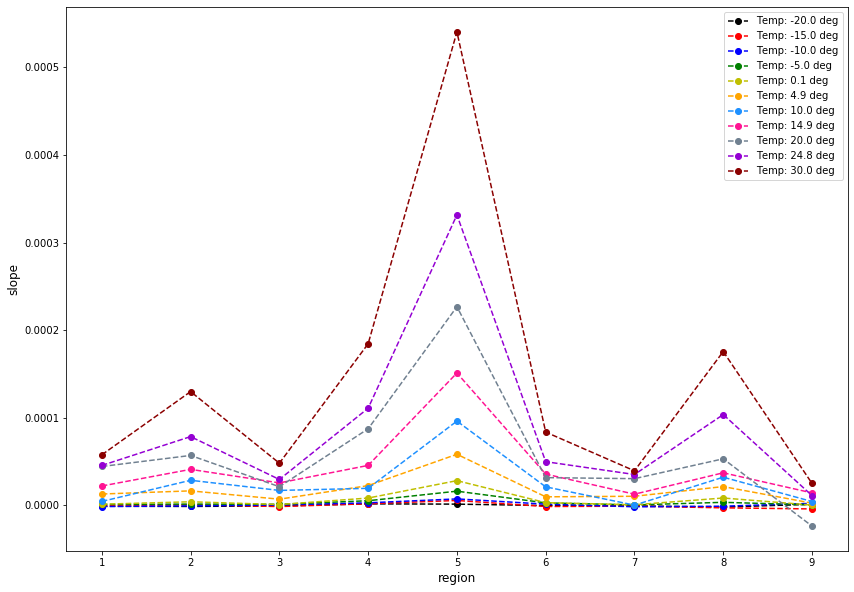

In [45]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']
cs = iter(colors)
plt.figure(figsize=(14,10))
for r in sorted(np.unique(temperatures)):
    col = next(cs)
    plt.plot(radiations[np.argwhere(temperatures==r)], slopes[np.argwhere(temperatures==r)],'--o',
                c=col, label = 'Temp: {} deg'.format(r))
    plt.ylabel('slope', size=12)
    plt.xlabel('region', size=12)
    plt.legend(loc='upper right')
    #plt.ylim(-0.0005, 0.0005)
    #plt.title('Temperature: {} deg'.format(r), size=14)
#plt.show()    
plt.savefig('Slope_vs_T_nodamage'.format(r))

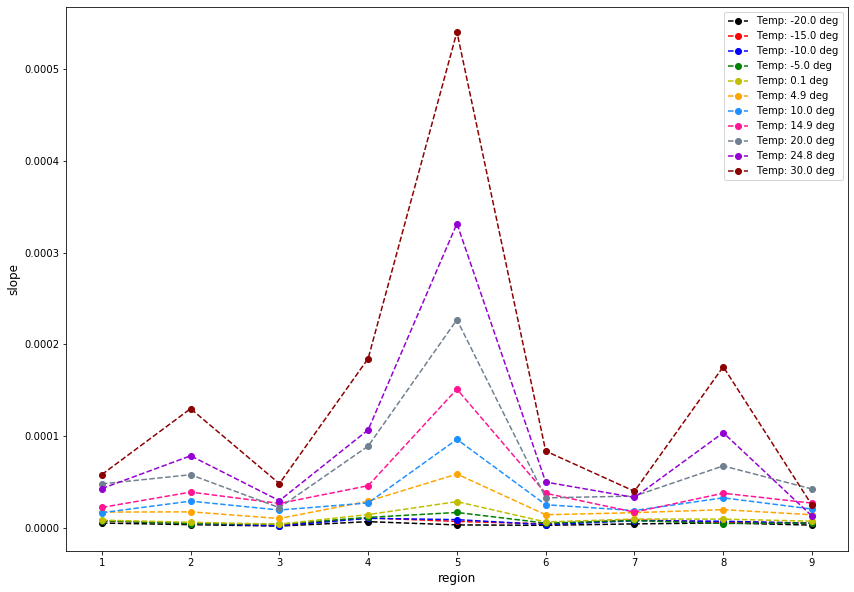

In [34]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']
cs = iter(colors)
plt.figure(figsize=(14,10))
for r in sorted(np.unique(temperatures)):
    col = next(cs)
    plt.plot(radiations[np.argwhere(temperatures==r)], slopes[np.argwhere(temperatures==r)],'--o',
                c=col, label = 'Temp: {} deg'.format(r))
    plt.ylabel('slope', size=12)
    plt.xlabel('region', size=12)
    plt.legend(loc='upper right')
    #plt.ylim(-0.0005, 0.0005)
    #plt.title('Temperature: {} deg'.format(r), size=14)
#plt.show()    
plt.savefig('Slope_vs_T_nodamage'.format(r))

In [37]:
avg = df.groupby(['T', 'region', 'tint'], as_index=False).agg({'intensity': ['mean', 'std']})

In [46]:
tints = []
Temps = []
rads = []
intensities = []
errors = []
for (T,r,t), group in avg[avg['region']<15][avg['T'].isin([-20.0, -10.0, 0.1, 10.0, 30.0])].groupby(['T', 'region', 'tint']):
    print(T,r,t, float(group[('intensity','mean')]), float(group[('intensity','std')]))
    Temps.append(T)
    tints.append(t)
    rads.append(r)
    intensities.append(float(group[('intensity','mean')]))
    errors.append(float(group[('intensity','std')]))

-20.0 1 1753440 3205.244187500001 57.20375149231972
-20.0 1 3857568 2990.6799999999994 28.785232352203323
-20.0 1 5260320 3073.5958750000004 19.00758213522994
-20.0 1 8767200 3025.9604999999974 7.287571245676233
-20.0 1 10169952 3199.0545125000017 81.87467099504175
-20.0 1 11572704 3065.089200000001 19.358481662993643
-20.0 1 13676832 3041.243199999999 10.673874498350187
-20.0 1 15780960 2995.8374500000004 28.540806476986884
-20.0 1 21391968 3137.8232625000005 119.29916900965543
-20.0 1 26301600 3078.4998375000014 25.41423495200674
-20.0 1 31912608 3046.030212499999 7.294426362186556
-20.0 1 33315360 3062.5269749999993 19.863746650730445
-20.0 1 35068800 3027.0568874999985 5.982455413117846
-20.0 2 1753440 3330.148175000001 9.864970928821856
-20.0 2 3857568 3342.4058624999993 10.09764372670706
-20.0 2 5260320 3296.4415624999992 19.504009108935573
-20.0 2 8767200 3335.271537499999 10.868287932339722
-20.0 2 10169952 3344.5982250000006 31.38451993310636
-20.0 2 11572704 3291.12005 17.702

0.1 3 13676832 4108.697800000001 6.479216117129574
0.1 3 15780960 4110.7263 6.760157706821051
0.1 3 21391968 4138.276525000003 21.281327675926793
0.1 3 26301600 4109.182824999999 41.495319992752094
0.1 3 31912608 4148.722375000001 7.145554982956885
0.1 4 1753440 3399.617725000001 26.29681764808158
0.1 4 2454816 3169.073674999999 89.37393180017023
0.1 4 3857568 3227.417062499999 26.783836470345435
0.1 4 5260320 3436.617150000002 8.177569214398678
0.1 4 6663072 3450.3426 30.60165236350642
0.1 4 7364448 3432.448412500002 7.460540337956291
0.1 4 8767200 3458.782762499998 18.15406990305653
0.1 4 10169952 3297.515824999999 28.889454306154793
0.1 4 10871328 3467.4358250000014 27.01919290514781
0.1 4 11572704 3301.6717 28.565072782821808
0.1 4 13676832 3425.176075 57.362331684878676
0.1 4 15780960 3456.772699999999 51.7175866193125
0.1 4 21391968 3344.0143749999984 90.86377823262698
0.1 4 26301600 3606.4200250000017 8.29486272036056
0.1 4 31912608 3617.9655500000017 56.471955029436984
0.1 5 17

30.0 4 1753440 3954.2340374999994 20.99847522383418
30.0 4 2454816 4049.617649999998 76.04961056400718
30.0 4 3857568 4369.7009375000025 56.966837607725516
30.0 4 5260320 4463.278125 113.30699798144516
30.0 4 6663702 4911.0194999999985 22.94832134137323
30.0 4 7364448 4994.728825 56.192596336479355
30.0 4 8767200 5257.215587500002 23.296714649083473
30.0 4 10169952 5514.727050000002 12.696660332167678
30.0 4 10871328 5573.5106125 53.680770910507555
30.0 4 11572704 5846.052962499999 66.88952296355005
30.0 5 1753440 4310.491837500002 12.242555222837819
30.0 5 2454816 4905.808712500002 44.84595712310775
30.0 5 3857568 5531.661099999998 167.9409744014007
30.0 5 5260320 6074.646262499995 126.59645106642184
30.0 5 6663702 7081.240775000004 81.57422649135371
30.0 5 7364448 7366.874199999999 174.77802479985075
30.0 5 8767200 8217.918237499993 49.087157806112984
30.0 5 10169952 8926.248837500001 40.053054851591774
30.0 5 10871328 9309.816200000001 25.216008849966876
30.0 5 11572704 9660.2292500

In [47]:
tints = np.array(tints)
Temps = np.array(Temps)
rads = np.array(rads)
intensities = np.array(intensities)
errors = np.array(errors)

/Users/cdesio/opt/anaconda3/envs/pyroot/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


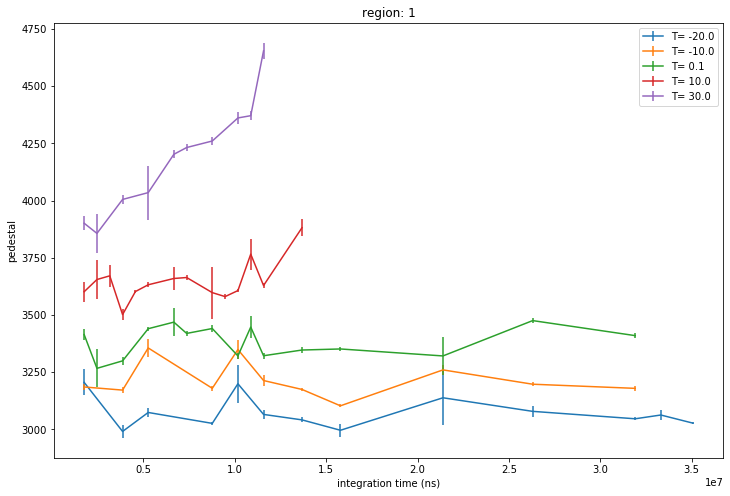

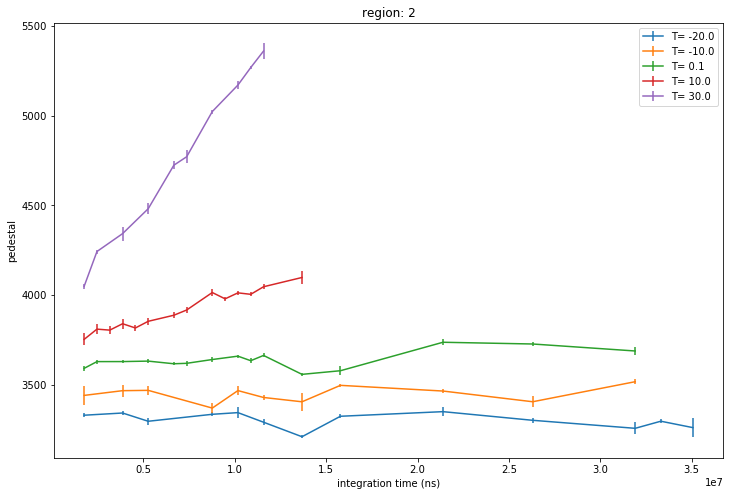

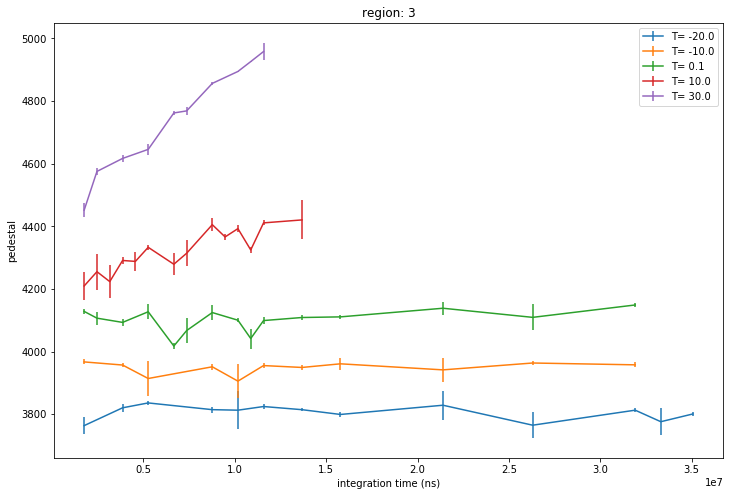

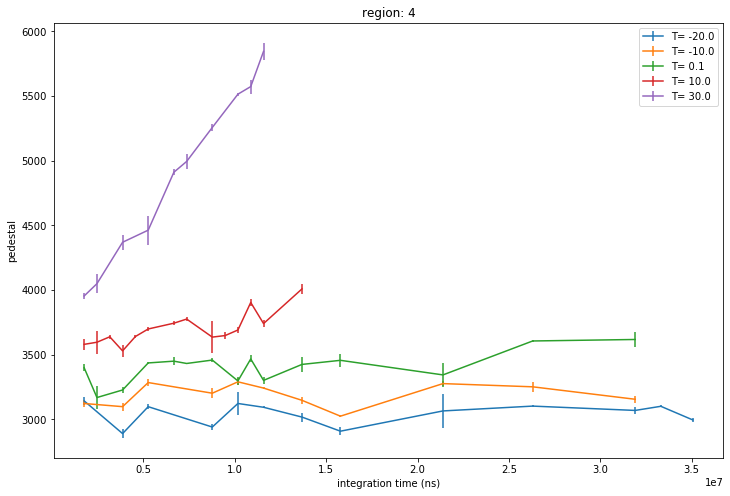

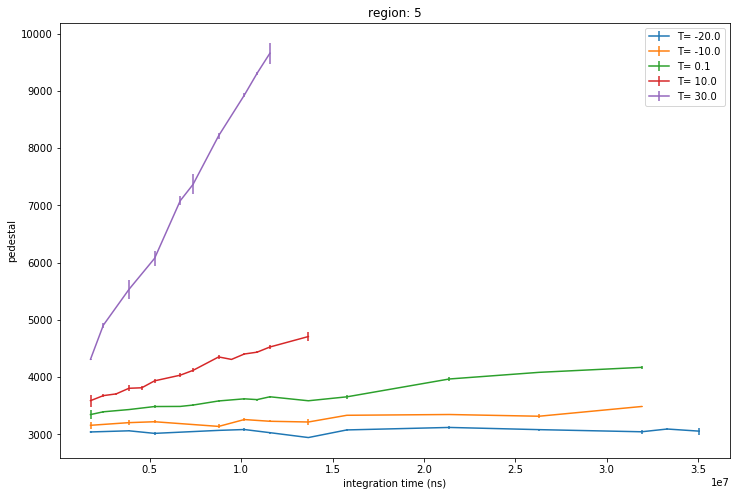

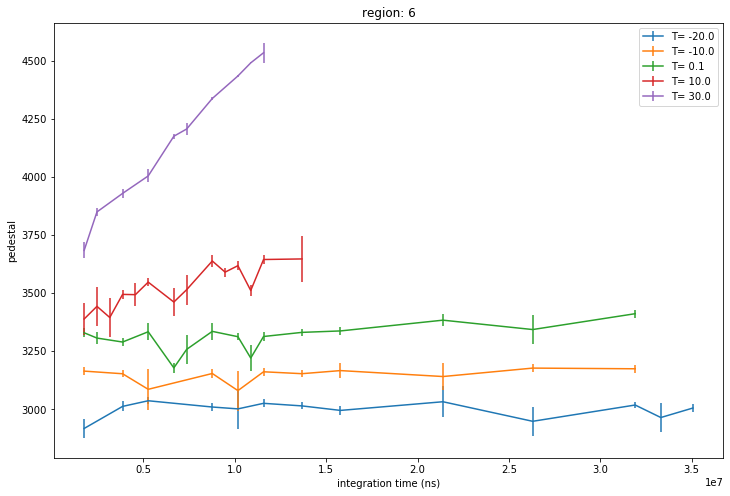

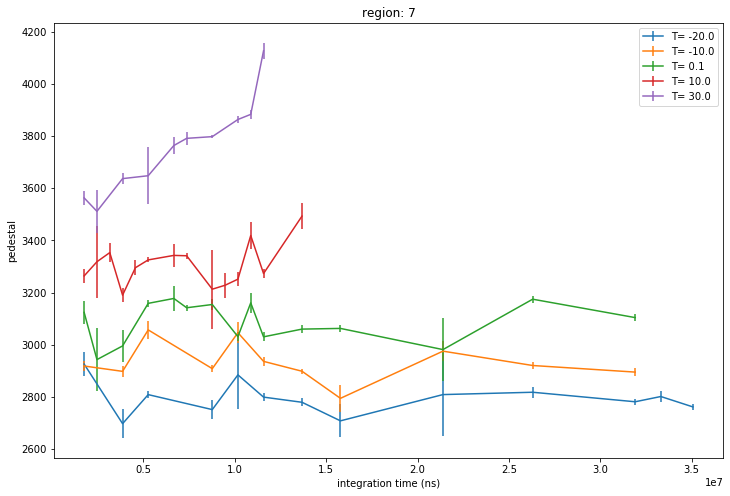

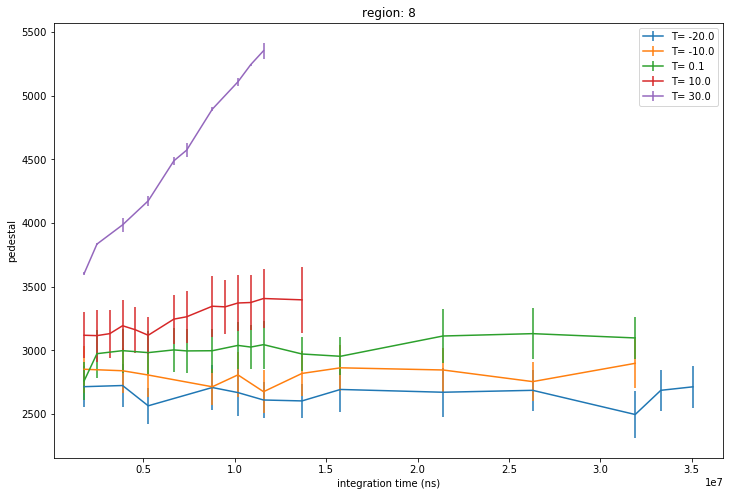

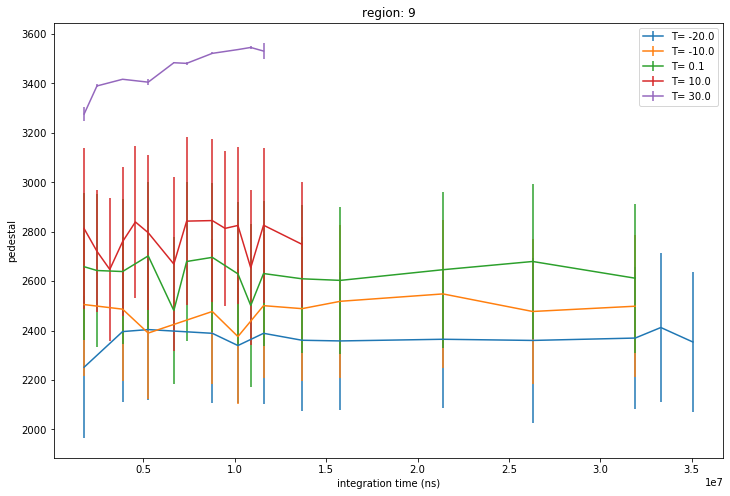

In [50]:
for r in np.unique(rads):
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        
        plt.plot(tints[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]], 
                 intensities[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]],
                 'o-',markersize=3,
                label = 'T= {}'.format(t))
        plt.title('region: {}'.format(r))
        plt.xlabel('integration time (ns)')
        plt.ylabel('pedestal')
    plt.legend(loc='upper right')
    plt.show()
    #plt.savefig('pedestal_vs_tint_5_temperatures_{}nodamage.png'.format(r))

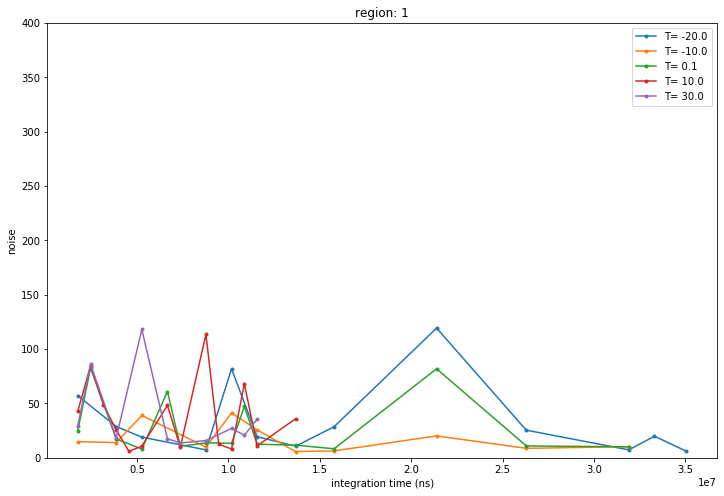

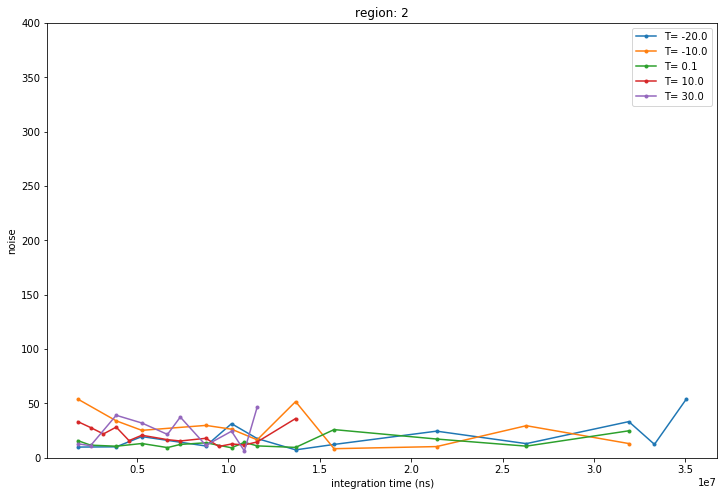

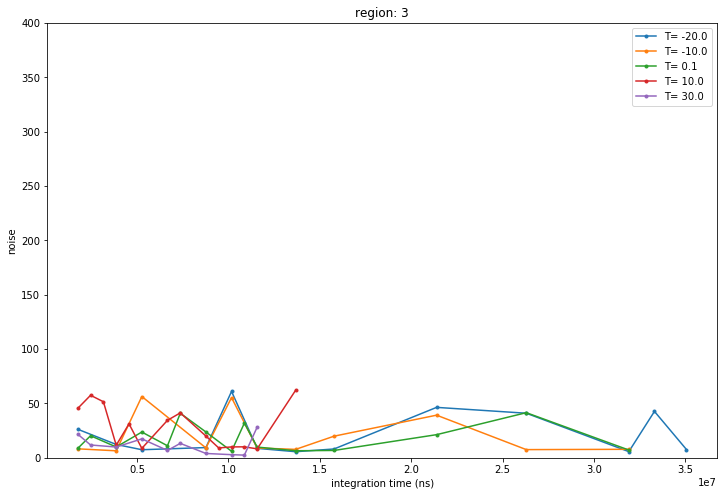

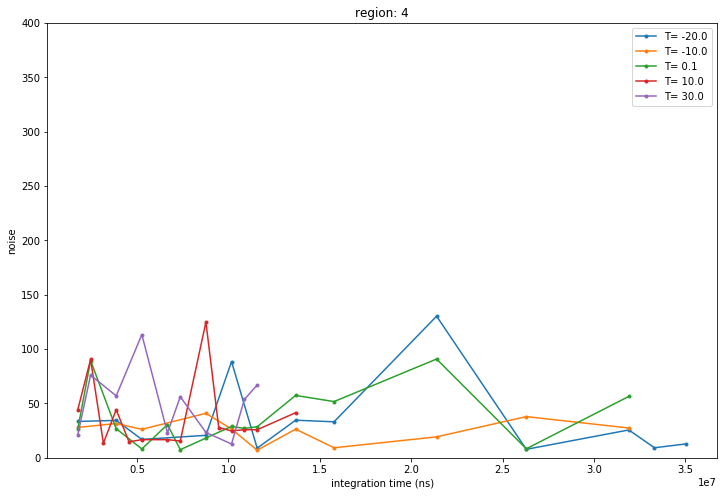

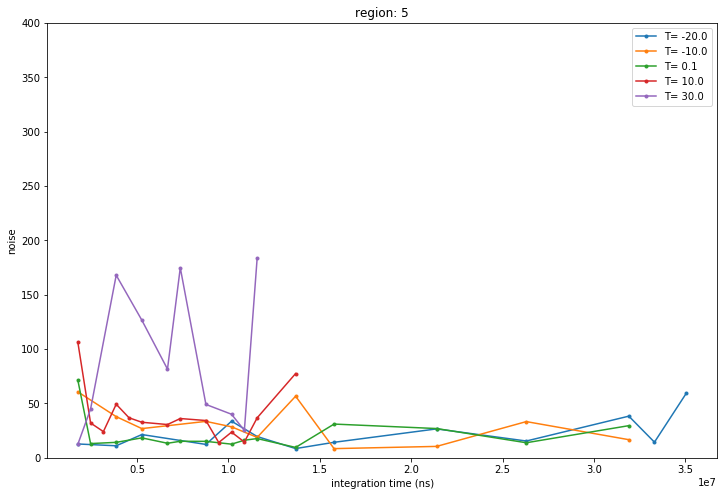

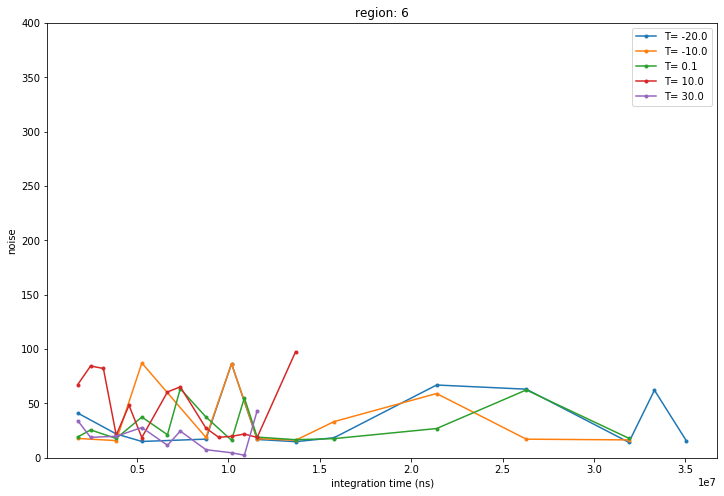

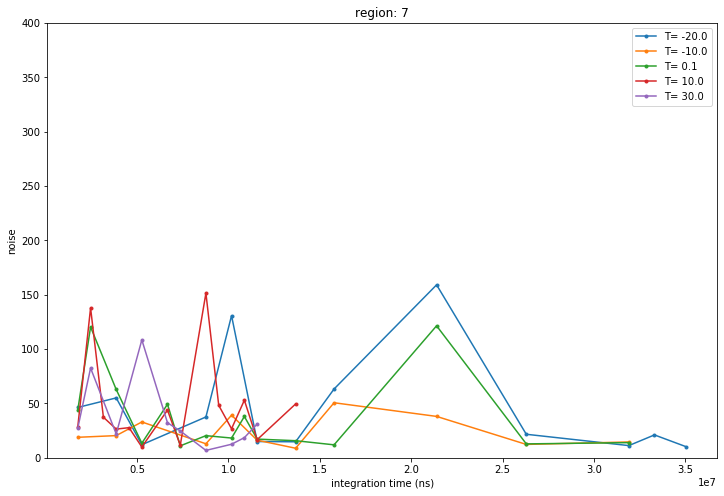

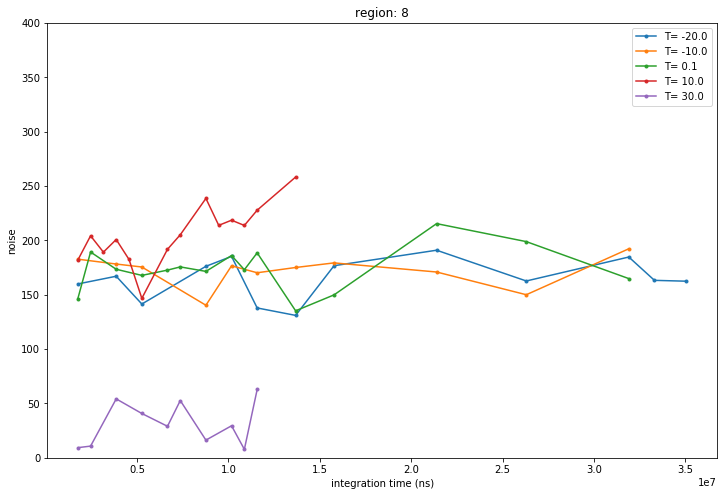

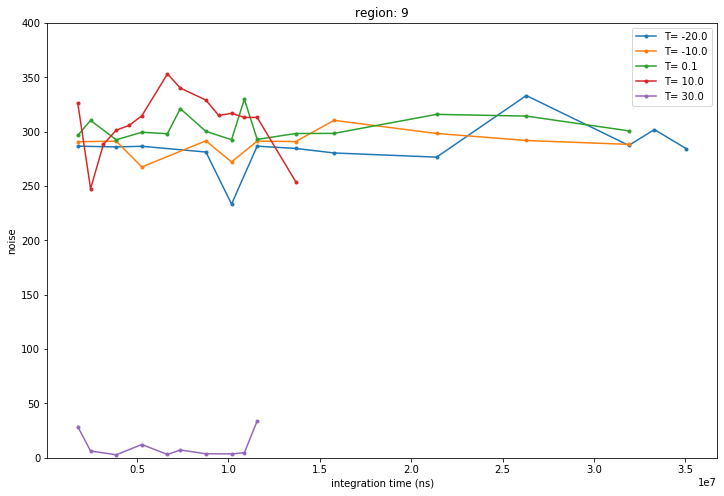

In [55]:
for r in np.unique(rads):
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        
        plt.plot(tints[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]], 
                 errors[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]],
                 'o-',markersize=3,
                label = 'T= {}'.format(t))
        plt.title('region: {}'.format(r))
        plt.xlabel('integration time (ns)')
        plt.ylabel('noise')
        plt.ylim((0,400))
    plt.legend(loc='upper right')
    #plt.show()
    plt.savefig('noise_vs_tint_5_temperatures_{}nodamage.png'.format(r))

alternative

In [62]:

def ravel_nested(ax):
    return np.vstack(ax).reshape(9, 400)

mean_pix_by_pix = np.empty((129,9))
std_pix_by_pix = np.empty((129,9))
temps = np.zeros((129,9))
tints = np.zeros((129,9))

for i,f in tqdm(enumerate(file_list), desc='file'):
    temps[i] = np.tile(np.float(f.split('_')[0][1:]),9)
    tints[i] = np.tile(int(regex.findall(f.split('_')[1])[0]),9)
    imported = np.load(os.path.join(extracted_folder,f), allow_pickle=True)['pixels']
    stacked = np.apply_along_axis(ravel_nested, 1, imported)
    mean_pix_by_pix[i]= np.mean(np.mean(stacked, axis=0), axis=1)
    std_pix_by_pix[i]= np.mean(np.std(stacked, axis=0), axis=1)

In [63]:
rad_dam = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

rad_dam = np.tile(rad_dam, 129).reshape(129, 9)

df = pd.DataFrame({"T":temps.ravel(), "tint":tints.ravel(), 'rad_dam':rad_dam.ravel(), 
                   'pedestal': mean_pix_by_pix.ravel(), 'noise':std_pix_by_pix.ravel()})



In [77]:
ttints = []
Temps = []
rads = []
intensities = []
errors = []
for (T,r,t), group in df[(df['rad_dam']<15) & (df['T'].isin([-20.0, -10.0, 0.1, 10.0, 14.9,20.0, 30.0]))].groupby(['T', 'rad_dam', 'tint']):
    #print(T,r,t,float(group['noise']), float(group['pedestal']))
    Temps.append(T)
    ttints.append(t)
    rads.append(r)
    intensities.append(float(group['pedestal']))
    errors.append(float(group['noise']))
    

ttints = np.array(ttints)
Temps = np.array(Temps)
rads = np.array(rads)
intensities = np.array(intensities)
errors = np.array(errors)

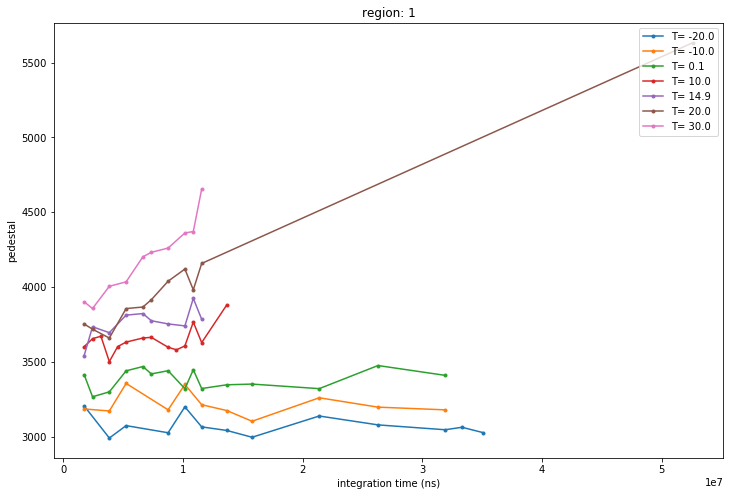

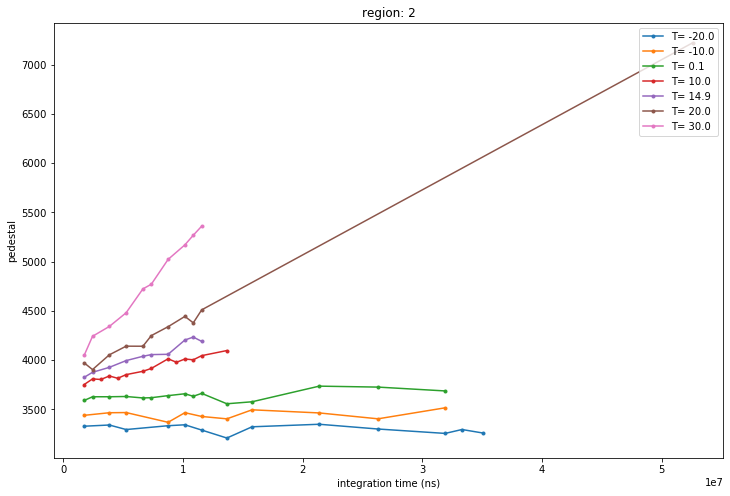

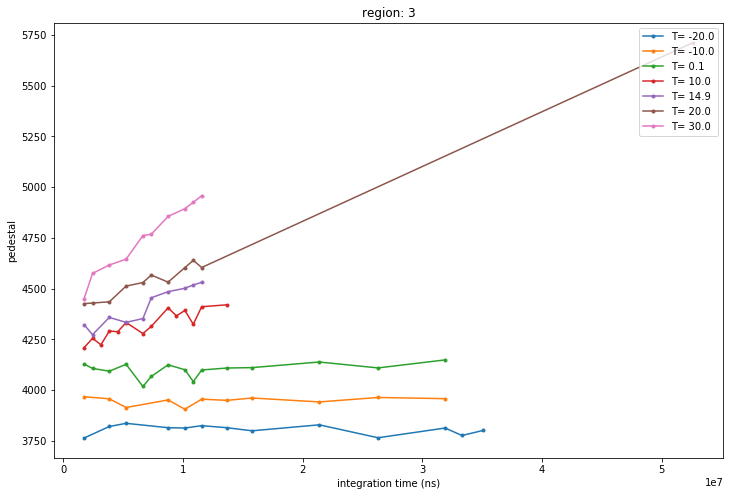

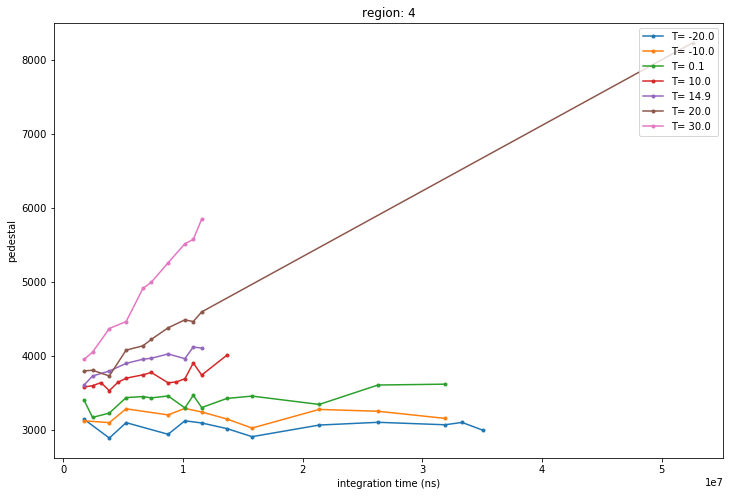

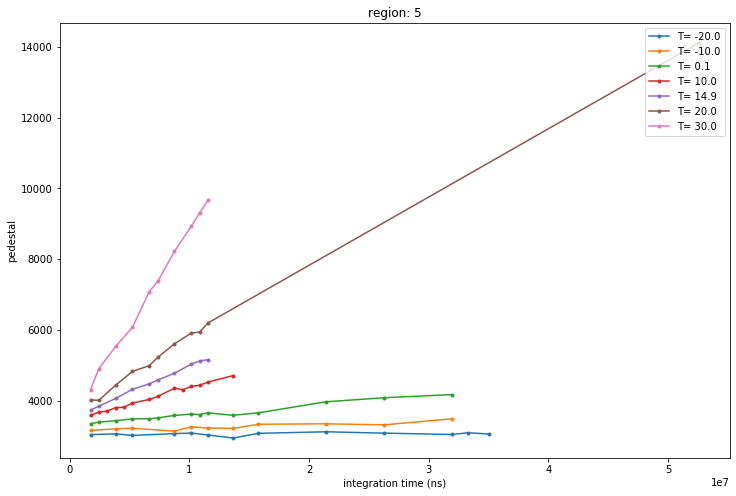

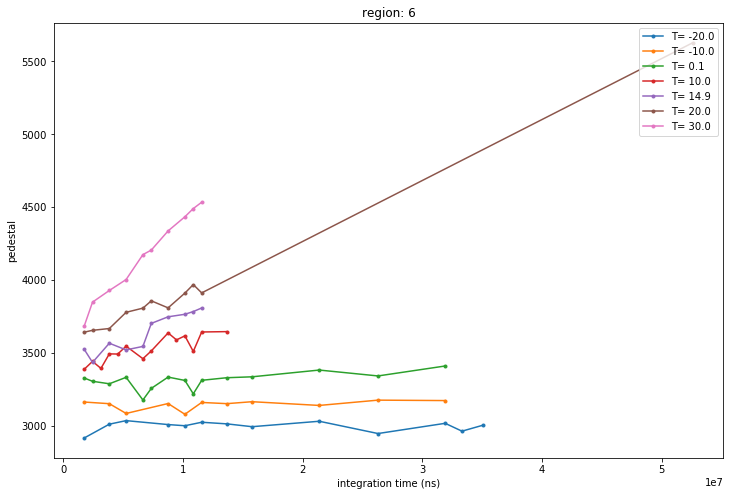

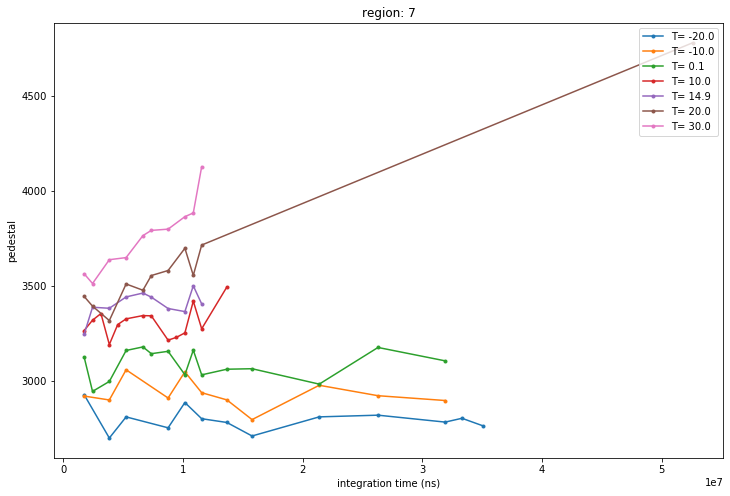

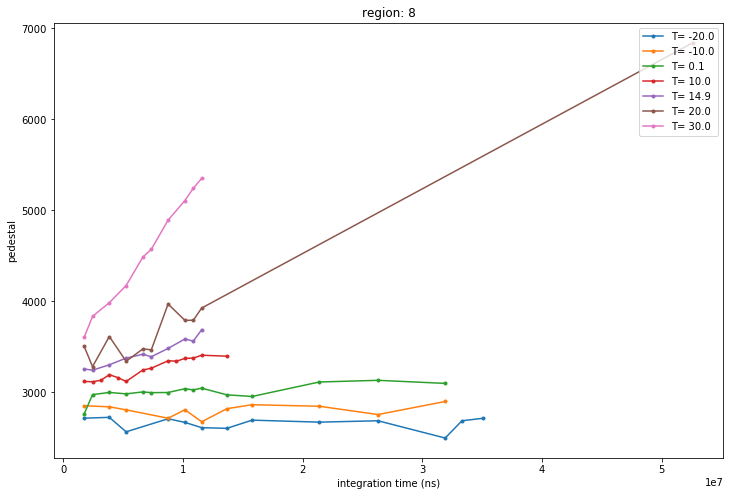

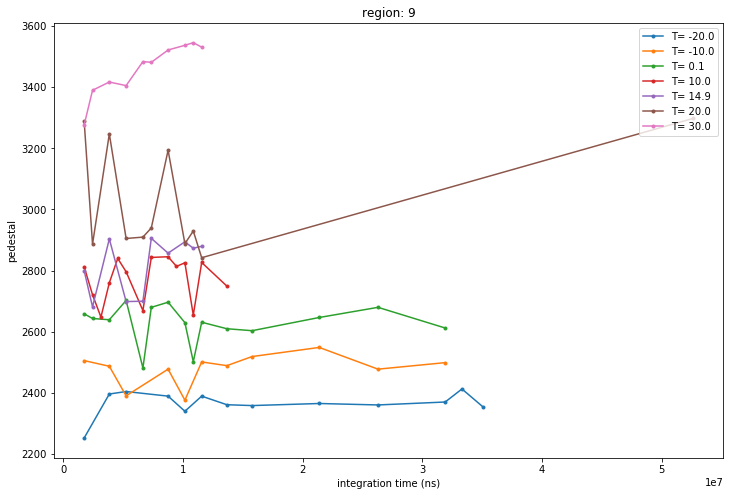

In [78]:
for r in np.unique(rads):
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        plt.plot(ttints[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]], 
                 intensities[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]],
                 'o-',markersize=3,
                label = 'T= {}'.format(t))
        plt.title('region: {}'.format(r))
        plt.xlabel('integration time (ns)')
        plt.ylabel('pedestal')
    plt.legend(loc='upper right')
    plt.show()

In [35]:

ttints = []
Temps = []
rads = []
intensities = []
errors = []
for (T,r,t), group in df[(df['region']<15) & (df['T'].isin([-20.0, -10.0, 0.1, 10.0, 14.9]))].groupby(['T', 'region', 'tint']):
    #print(T,r,t,float(group['noise']), float(group['pedestal']))
    Temps.append(T)
    ttints.append(t)
    rads.append(r)
    intensities.append(float(group['pedestal']))
    errors.append(float(group['noise']))


In [36]:
ttints = np.array(ttints)
Temps = np.array(Temps)
rads = np.array(rads)
intensities = np.array(intensities)
errors = np.array(errors)

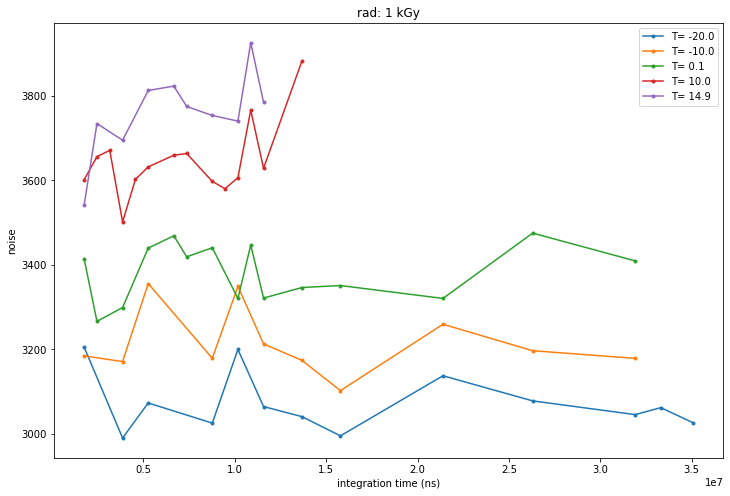

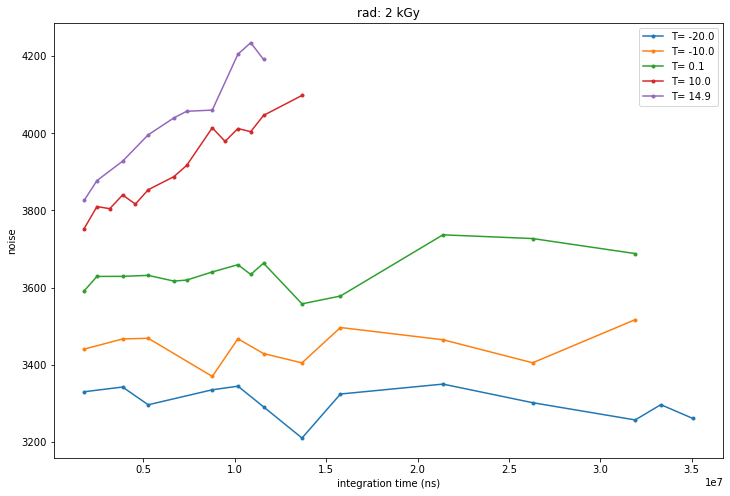

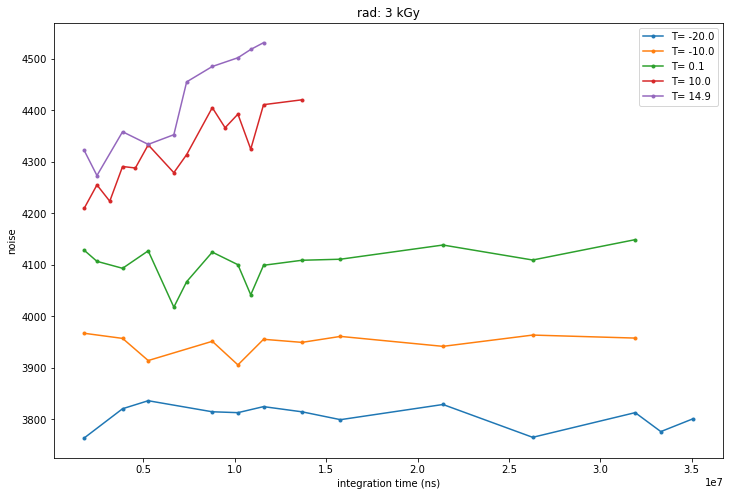

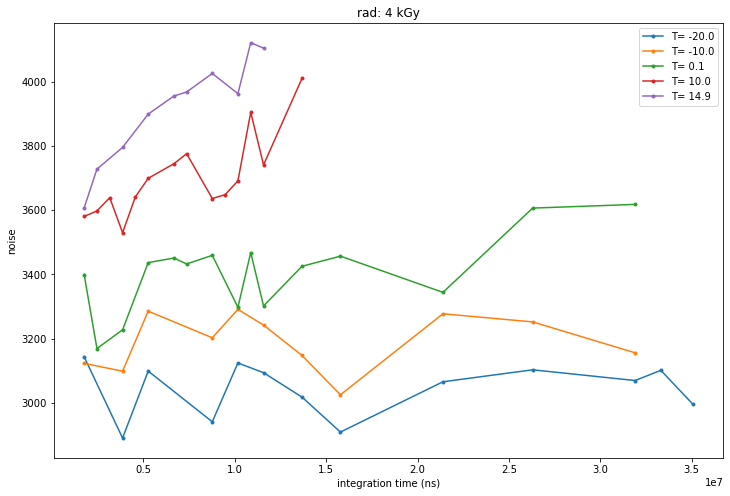

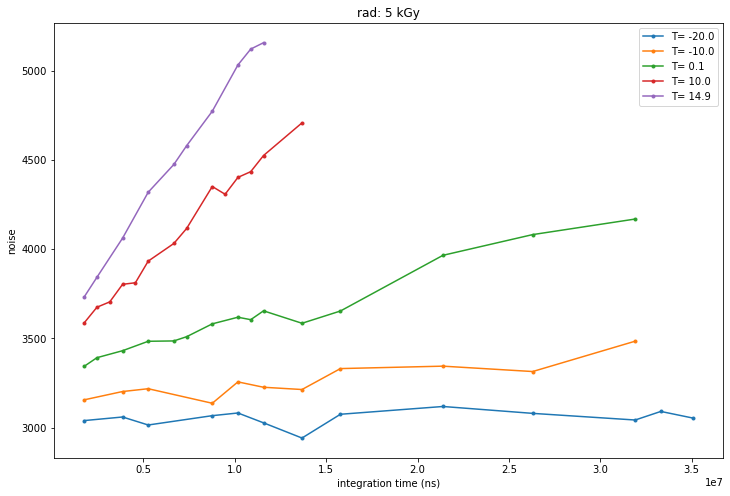

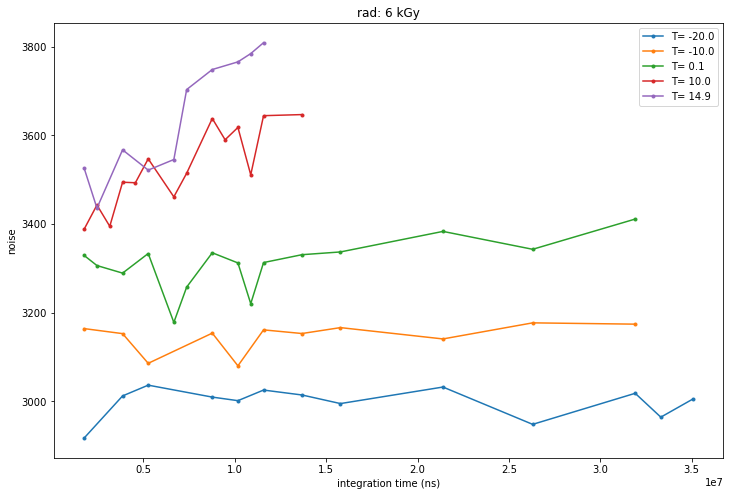

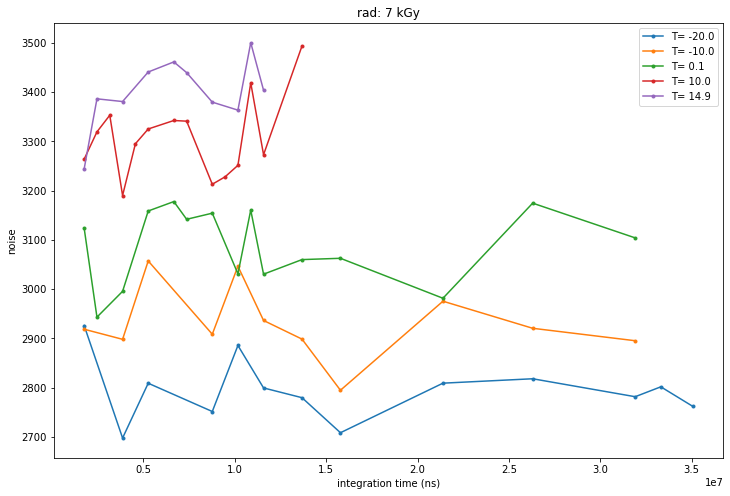

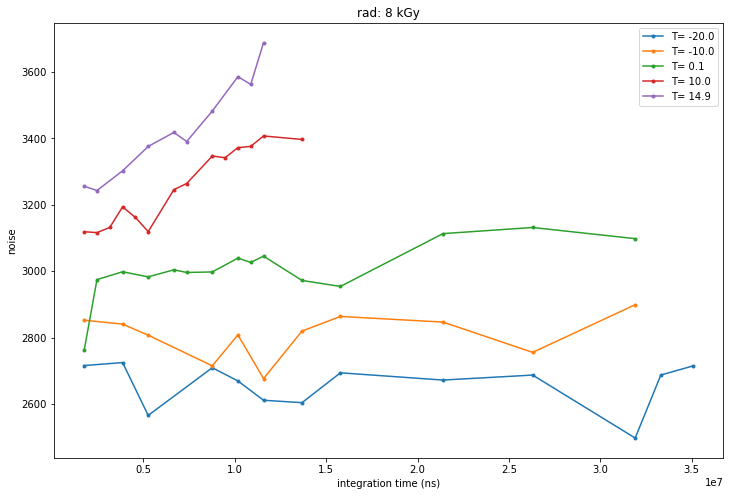

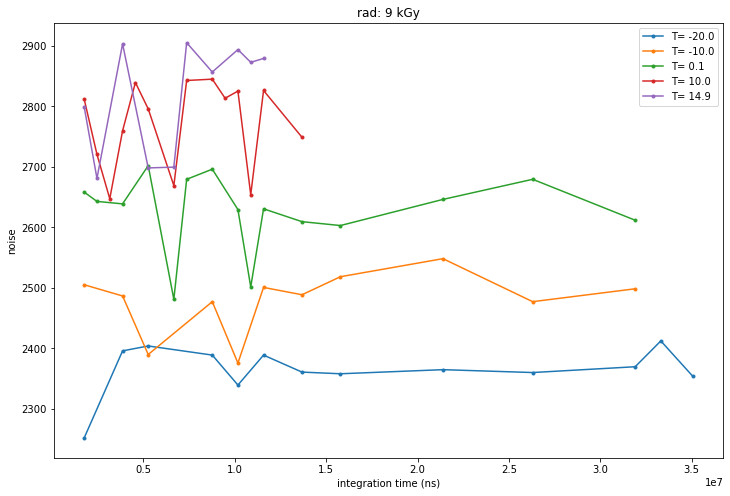

In [37]:
for r in np.unique(rads):
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        plt.plot(ttints[np.argwhere(rads==r).ravel()][np.where(Temps[np.argwhere(rads==r).ravel()]==t)[0]], 
                 intensities[np.argwhere(rads==r).ravel()][np.where(Temps[np.argwhere(rads==r).ravel()]==t)[0]],
                 'o-',markersize=3,
                label = 'T= {}'.format(t))
        plt.title('rad: {} kGy'.format(r))
        plt.xlabel('integration time (ns)')
        plt.ylabel('noise')
#         plt.ylim(0,3500)
    plt.legend(loc='upper right')
    plt.show()

In [44]:
for r in np.unique(rads):
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        
        plt.plot(tints[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]], 
                 intensities[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]],
                 'o-',markersize=3,
                label = 'T= {}'.format(t))
        plt.title('region: {}'.format(r))
        plt.xlabel('integration time (ns)')
        plt.ylabel('pedestal')
    plt.legend(loc='upper right')
    plt.show()
    #plt.savefig('pedestal_vs_tint_5_temperatures_{}nodamage.png'.format(r))

IndexError: index 216 is out of bounds for axis 0 with size 129

<Figure size 864x576 with 0 Axes>